In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import re
import string
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv("D:/Project/Sentiment_Analysis/Dataset/Raw/training.1600000.processed.noemoticon (sentiment140).csv", encoding='latin-1', names=column_names )

In [12]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [14]:
df['target']=df['target'].replace({4:1})

In [15]:
df["target"].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [16]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

Since the dataset has only positive and negative sentiment i created the Neutral Sentiment by using vanderSentiment.

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load Sentiment140 dataset
df = pd.read_csv("D:/Project/Sentiment_Analysis/Dataset/Raw/training.1600000.processed.noemoticon (sentiment140).csv", encoding='latin-1', usecols=[0, 5], names=["label", "text"])

# Convert labels (0=negative, 4=positive)
df['label'] = df['label'].replace(4, 2)  # Make 4 → 2 (positive)

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to classify neutral tweets
def classify_neutral(text):
    score = analyzer.polarity_scores(text)['compound']
    if -0.25 <= score <= 0.25:  # Adjust threshold as needed
        return 1  # Neutral
    return None  # Keep original label

# Apply function
df['neutral_label'] = df['text'].apply(classify_neutral)

# Fill in neutral class where applicable
df['label'] = df['neutral_label'].combine_first(df['label'])

# Remove extra column
df.drop(columns=['neutral_label'], inplace=True)

# Check new class distribution
print(df['label'].value_counts())

1.0    589963
2.0    527432
0.0    482605
Name: label, dtype: int64


In [18]:
df.head()

,label,text
0,1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0.0,is upset that he can't update his Facebook by ...
2,0.0,@Kenichan I dived many times for the ball. Man...
3,1.0,my whole body feels itchy and like its on fire
4,0.0,"@nationwideclass no, it's not behaving at all...."


In [13]:
import os

folder_path = "D:\Project\Sentiment_Analysis\Dataset\pre_processed"  # Change this to your preferred folder
file_name = "Sentiment140_dataset_with_neutral_sentiment.csv"

# ✅ Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)  # Creates the folder if it doesn't exist

# Save the file
df.to_csv(os.path.join(folder_path, file_name), index=False)


In [9]:
df=pd.read_csv("Sentiment140_dataset_with_netural_sentiment.csv")

In [19]:
df.head()

,label,text
0,1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0.0,is upset that he can't update his Facebook by ...
2,0.0,@Kenichan I dived many times for the ball. Man...
3,1.0,my whole body feels itchy and like its on fire
4,0.0,"@nationwideclass no, it's not behaving at all...."


In [20]:
# for Deep learning model we will use only text and label column
def preprocess_text(text):
    """
    Preprocess a given text string by performing the following steps:
      1. Convert the text to lowercase.
      2. Remove URLs (e.g., http:// or https:// links).
      3. Remove Twitter mentions (e.g., @username).
      4. Remove hashtag symbols, retaining the hashtagged word.
      5. Remove HTML tags.
      6. Remove punctuation.
      7. Remove numbers.
      8. Remove extra whitespace.
      9. Remove stop words.

    Parameters:
      text (str): The input text string (tweet) to be cleaned.

    Returns:
      str: The cleaned text string.
    """
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove Twitter mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtag symbols (keep the text)
    text = re.sub(r'#', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stop words
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return " ".join(filtered_tokens)

# Apply the preprocessing function to the 'text' column and create a new column 'clean_text'
df['clean_text'] = df['text'].apply(preprocess_text)

In [21]:
df.head()

,label,text,clean_text
0,1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0.0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0.0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,1.0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0.0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [19]:
import os

folder_path = "D:\Project\Sentiment_Analysis\Dataset\pre_processed"  # Change this to your preferred folder
file_name = "Sentiment140_dataset_with_neutal&cleantext.csv"

# ✅ Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)  # Creates the folder if it doesn't exist

# Save the file
df.to_csv(os.path.join(folder_path, file_name), index=False)


In [2]:
df = pd.read_csv("D:/Project/Sentiment_Analysis/Dataset/pre_processed/Sentiment140_dataset_with_neutal&cleantext.csv")

In [4]:
df.head(50)

,label,text,clean_text
0,1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0.0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0.0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,1.0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0.0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see
5,1.0,@Kwesidei not the whole crew,whole crew
6,0.0,Need a hug,need hug
7,0.0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rains bit bit lol im fin...
8,1.0,@Tatiana_K nope they didn't have it,nope didnt
9,1.0,@twittera que me muera ?,que muera


In [23]:
# tokenizer is used to convert text data into numerical data
# pad_sequences is used to make all the text data of same length

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

VOCAB_SIZE = 20000
max_length = 50

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<oov>")
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

print(padded_sequences[:10])


[[  354    43  1089  3308    14   753  9596  1728     4     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  663    13   433   437  1887   191   417  2162    74     9   170  1069
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    1   212   248  1212  1500   781   362     7     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  320   703   370  2751     6  1047     0     0     0     0     0

In [20]:
import pickle

# Save the tokenizer for laster use
with open("D:/Project/Sentiment_Analysis/Model/tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle)

print("Tokenizer saved successfully!")


Tokenizer saved successfully!


In [24]:
df["label"].value_counts()

1.0    589963
2.0    527432
0.0    482605
Name: label, dtype: int64

In [25]:
# gensim is used to load pre-trained word embeddings
# It converts words into meaningful numerical vectors based on real-world context.


from tensorflow.keras.layers import Embedding, LSTM, Dense
import gensim.downloader as api

# Load pre-trained GloVe Twitter embeddings (100-dimensional)
embedding_model = api.load("glove-twitter-100")
embedding_dim = 100

print("GloVe Twitter embeddings loaded successfully!")

GloVe Twitter embeddings loaded successfully!


In [26]:
# Create an embedding matrix for our vocabulary
from tensorflow.keras.preprocessing.text import Tokenizer

#word_index = Tokenizer.word_index
embedding_matrix = np.zeros((VOCAB_SIZE, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < VOCAB_SIZE and word in embedding_model:
        embedding_matrix[i] = embedding_model[word]


In [27]:
X = padded_sequences
Y = df['label'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

print(f"Training Size: {X_train.shape}, Testing Size: {X_test.shape}")

Training Size: (1120000, 50), Testing Size: (480000, 50)


In [28]:
print(Y_train[:5])

[2. 1. 2. 2. 0.]


In [29]:
# Convert labels to categorical (One-Hot Encoding for 3 classes)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=3)

In [30]:
print(Y_train[:5])

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [31]:
print(Y_test[:5])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


Model training

LSTM Model(Long Short-Term Memory)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [33]:
lstm_model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=False),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  
])

In [34]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# to overcome classimbalance we use class_weight
# class_weight is used to give more weightage to minority class
from sklearn.utils.class_weight import compute_class_weight 


# Convert one-hot encoding to class labels (0, 1, 2)
Y_train_labels = np.argmax(Y_train, axis=1)

class_labels = np.unique(Y_train_labels)

class_weights = compute_class_weight('balanced', classes=class_labels, y=Y_train_labels)

# Convert to dictionary
class_weight_dict = {class_labels[i]: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weight_dict)

Class Weights: {0: 1.1051119320514036, 1: 0.9040117134089152, 2: 1.0111898996574593}


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM Model with Class Weights & Early Stopping
lstm_history=lstm_model.fit(
    X_train, Y_train,
    validation_split=0.1,
    epochs=10,  # Set high, but early stopping will stop if needed
    batch_size=128,
    class_weight={0: 1.45, 1: 0.69, 2: 1.17},  # Use computed class weights
    callbacks=[early_stop]  # Add early stopping
)


Epoch 1/10
7875/7875 [==============================] - 119s 15ms/step - loss: 0.6074 - accuracy: 0.7784 - val_loss: 0.5300 - val_accuracy: 0.7877
Epoch 2/10
7875/7875 [==============================] - 142s 18ms/step - loss: 0.5797 - accuracy: 0.7905 - val_loss: 0.5253 - val_accuracy: 0.7905
Epoch 3/10
7875/7875 [==============================] - 121s 15ms/step - loss: 0.5624 - accuracy: 0.7976 - val_loss: 0.5146 - val_accuracy: 0.7954
Epoch 4/10
7875/7875 [==============================] - 111s 14ms/step - loss: 0.5494 - accuracy: 0.8031 - val_loss: 0.5063 - val_accuracy: 0.7983
Epoch 5/10
7875/7875 [==============================] - 112s 14ms/step - loss: 0.5388 - accuracy: 0.8075 - val_loss: 0.5091 - val_accuracy: 0.7946
Epoch 6/10
7875/7875 [==============================] - 114s 14ms/step - loss: 0.5303 - accuracy: 0.8111 - val_loss: 0.5029 - val_accuracy: 0.8008
Epoch 7/10
7875/7875 [==============================] - 114s 14ms/step - loss: 0.5222 - accuracy: 0.8142 - val_loss: 0

In [38]:
test_loss, test_acc = lstm_model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc:.4f}")

15000/15000 [==============================] - 95s 6ms/step - loss: 0.5074 - accuracy: 0.8002
Test Accuracy: 0.8002


15000/15000 [==============================] - 83s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73    144781
           1       0.90      0.85      0.87    176989
           2       0.80      0.77      0.79    158230

    accuracy                           0.80    480000
   macro avg       0.80      0.80      0.80    480000
weighted avg       0.81      0.80      0.80    480000



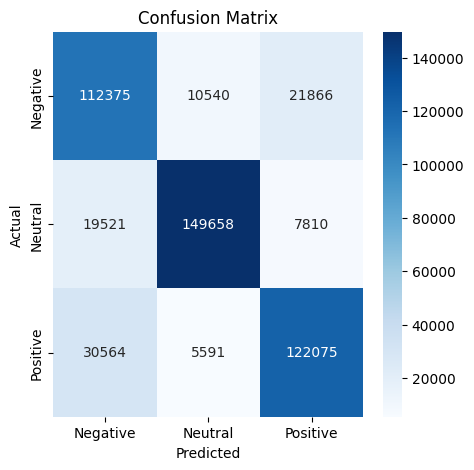

In [39]:

# Get model predictions
# Predictions
# Convert Y_test from one-hot encoding to label format
Y_test_labels = np.argmax(Y_test, axis=1)

lstm_probs = lstm_model.predict(X_test)
lstm_preds = np.argmax(lstm_probs, axis=1) 

# Classification report
print("Classification Report:\n", classification_report(Y_test_labels, lstm_preds))

# Confusion Matrix
cm = confusion_matrix(Y_test_labels, lstm_preds)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


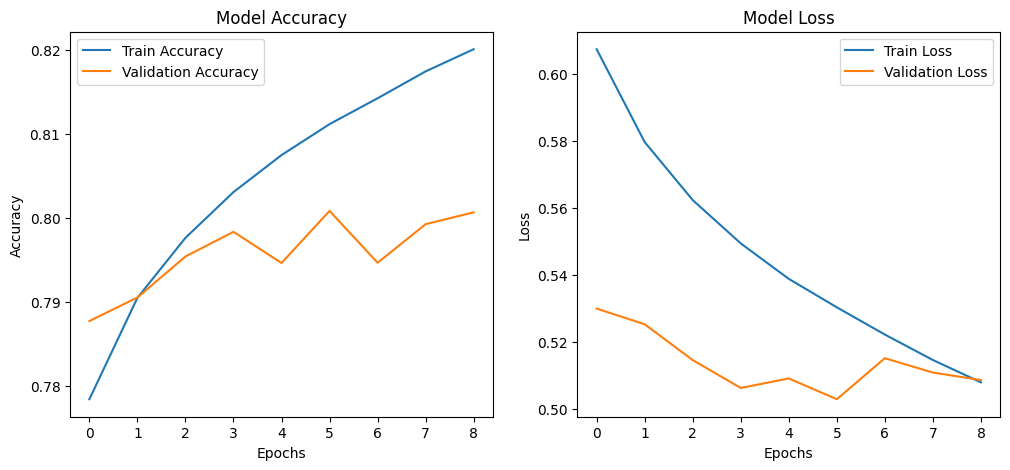

In [40]:
# Plot Training History
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


In [41]:
lstm_model.save("D:/Project/Sentiment_Analysis/Model/with_netural_sentiment/lstm_sentiment_model.h5")

MLFLOW LOG

2025/03/23 14:47:55 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Logging LSTM model...


INFO:tensorflow:Assets written to: C:\Users\loges\AppData\Local\Temp\tmpogjnhnnc\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\loges\AppData\Local\Temp\tmpogjnhnnc\model\data\model\assets
2025/03/23 14:48:13 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\loges\AppData\Local\Temp\tmpogjnhnnc\model, flavor: tensorflow), fall back to return ['tensorflow==2.10.1']. Set logging level to DEBUG to see the full traceback.
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


15000/15000 [==============================] - 100s 7ms/step
LSTM model and metrics logged successfully!
LSTM model logged Accuracy: 0.8002


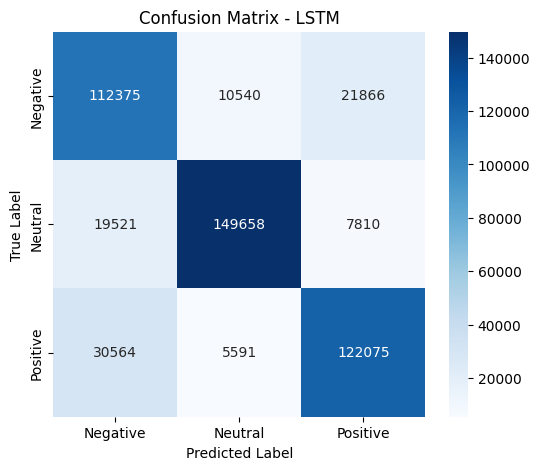

In [43]:
import mlflow
import mlflow.tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set up MLflow
experiment_name = "SentimentAnalysis_Models"
mlflow.set_experiment(experiment_name)
mlflow.set_tracking_uri("http://127.0.0.1:5000")

#Load LSTM Model
#lstm_model = tf.keras.models.load_model("D:/Project/Sentiment_Analysis/lstm_sentiment_model_netural_option_2.h5") 


with mlflow.start_run(run_name="lstm_model"):
    print("Logging LSTM model...")

    # Log model in MLflow
    mlflow.tensorflow.log_model(lstm_model, "LSTM_Threshold_0.25")

    # Log hyperparameters
    mlflow.log_param("batch_size", 128)
    mlflow.log_param("epochs", 8)
    mlflow.log_param("model_type", "LSTM")

    # Evaluate model
    y_pred_probs = lstm_model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(Y_test, axis=1)

    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Compute classification report
    report = classification_report(y_true, y_pred, output_dict=True)

    # Log all metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision_negative", report["0"]["precision"])
    mlflow.log_metric("recall_negative", report["0"]["recall"])
    mlflow.log_metric("f1_negative", report["0"]["f1-score"])
    mlflow.log_metric("precision_neutral", report["1"]["precision"])
    mlflow.log_metric("recall_neutral", report["1"]["recall"])
    mlflow.log_metric("f1_neutral", report["1"]["f1-score"])
    mlflow.log_metric("precision_positive", report["2"]["precision"])
    mlflow.log_metric("recall_positive", report["2"]["recall"])
    mlflow.log_metric("f1_positive", report["2"]["f1-score"])

    # Log classification report as JSON
    mlflow.log_dict(report, "classification_report.json")

    # Log Confusion Matrix as Image
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
                xticklabels=["Negative", "Neutral", "Positive"],
                yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - LSTM")
    
    # Save and log confusion matrix
    conf_matrix_filename = "LSTM_Threshold_0.25_conf_matrix.png"
    plt.savefig(conf_matrix_filename)
    mlflow.log_artifact(conf_matrix_filename)

    print("LSTM model and metrics logged successfully!")
    print(f"LSTM model logged Accuracy: {accuracy:.4f}")


GRU (Gated Recurrent Unit)

In [44]:
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

In [45]:
from tensorflow.keras.layers import Bidirectional, GRU
from tensorflow.keras.models import Sequential

gru_model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=False),
    Bidirectional(GRU(128, return_sequences=True)),  
    Dropout(0.2),
    Bidirectional(GRU(64)),  
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])


In [46]:
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
from sklearn.utils.class_weight import compute_class_weight 


# Convert one-hot encoding to class labels (0, 1, 2)
Y_train_labels = np.argmax(Y_train, axis=1)

class_labels = np.unique(Y_train_labels)

class_weights = compute_class_weight('balanced', classes=class_labels, y=Y_train_labels)

# Convert to dictionary
class_weight_dict = {class_labels[i]: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weight_dict)

Class Weights: {0: 1.1051119320514036, 1: 0.9040117134089152, 2: 1.0111898996574593}


In [48]:
print(X_train.shape, Y_train.shape)


(1120000, 50) (1120000, 3)


In [49]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


gru_history=gru_model.fit(
    X_train, Y_train,
    validation_split=0.1,
    epochs=8,  # Set high, but early stopping will stop if needed
    batch_size=128,
    class_weight=class_weight_dict,  # Use computed class weights
    callbacks=[early_stop]  # Add early stopping
)


Epoch 1/8
7875/7875 [==============================] - 202s 25ms/step - loss: 0.6130 - accuracy: 0.7542 - val_loss: 0.5412 - val_accuracy: 0.7830
Epoch 2/8
7875/7875 [==============================] - 194s 25ms/step - loss: 0.5394 - accuracy: 0.7896 - val_loss: 0.5085 - val_accuracy: 0.7957
Epoch 3/8
7875/7875 [==============================] - 191s 24ms/step - loss: 0.5143 - accuracy: 0.8005 - val_loss: 0.5023 - val_accuracy: 0.8013
Epoch 4/8
7875/7875 [==============================] - 191s 24ms/step - loss: 0.4990 - accuracy: 0.8071 - val_loss: 0.4921 - val_accuracy: 0.8047
Epoch 5/8
7875/7875 [==============================] - 191s 24ms/step - loss: 0.4871 - accuracy: 0.8116 - val_loss: 0.4901 - val_accuracy: 0.8050
Epoch 6/8
7875/7875 [==============================] - 193s 24ms/step - loss: 0.4769 - accuracy: 0.8161 - val_loss: 0.4922 - val_accuracy: 0.8046
Epoch 7/8
7875/7875 [==============================] - 190s 24ms/step - loss: 0.4683 - accuracy: 0.8195 - val_loss: 0.4963 -

In [50]:
# Evaluate Model
loss, accuracy = gru_model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")

15000/15000 [==============================] - 144s 10ms/step - loss: 0.4929 - accuracy: 0.8046
Test Accuracy: 0.8046


15000/15000 [==============================] - 133s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73    144781
           1       0.89      0.86      0.88    176989
           2       0.78      0.81      0.80    158230

    accuracy                           0.80    480000
   macro avg       0.80      0.80      0.80    480000
weighted avg       0.81      0.80      0.80    480000



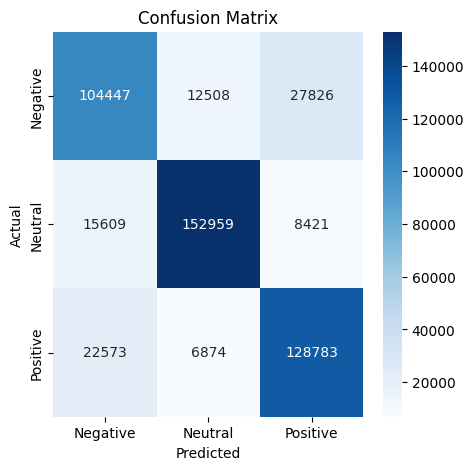

In [51]:
# Get model predictions
# Predictions
# Convert Y_test from one-hot encoding to label format
Y_test_labels = np.argmax(Y_test, axis=1)

gru_probs = gru_model.predict(X_test)
gru_preds = np.argmax(gru_probs, axis=1) 

# Classification report
print("Classification Report:\n", classification_report(Y_test_labels, gru_preds))

# Confusion Matrix
cm = confusion_matrix(Y_test_labels, gru_preds)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

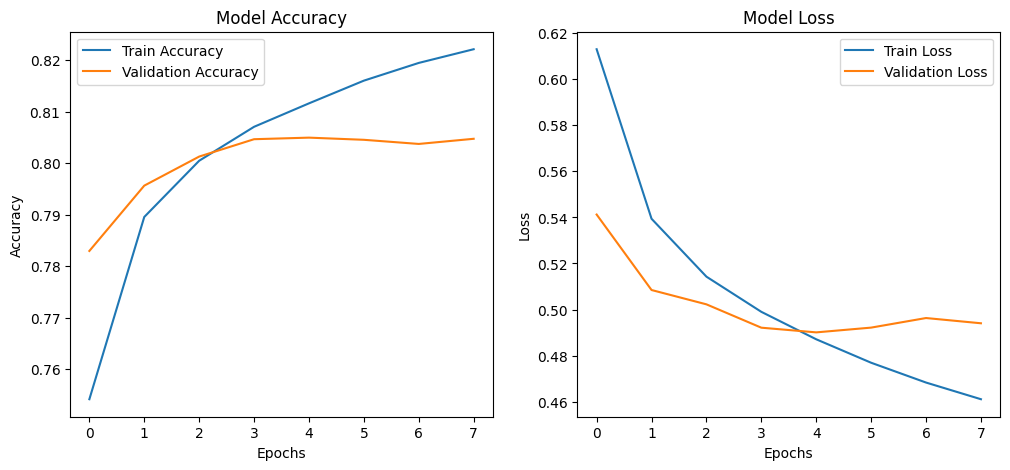

In [52]:
# Plot Training History
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(gru_history.history['loss'], label='Train Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


In [53]:
gru_model.save("D:/Project/Sentiment_Analysis/Model/with_netural_sentiment/gru_sentiment_model.h5")

MLFLOW LOG

2025/03/23 15:22:28 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Logging GRU model...


INFO:tensorflow:Assets written to: C:\Users\loges\AppData\Local\Temp\tmp1cvricn3\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\loges\AppData\Local\Temp\tmp1cvricn3\model\data\model\assets
2025/03/23 15:23:21 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\loges\AppData\Local\Temp\tmp1cvricn3\model, flavor: tensorflow), fall back to return ['tensorflow==2.10.1']. Set logging level to DEBUG to see the full traceback.


15000/15000 [==============================] - 146s 10ms/step
GRU model and metrics logged successfully!
GRU model logged Accuracy: 0.8046


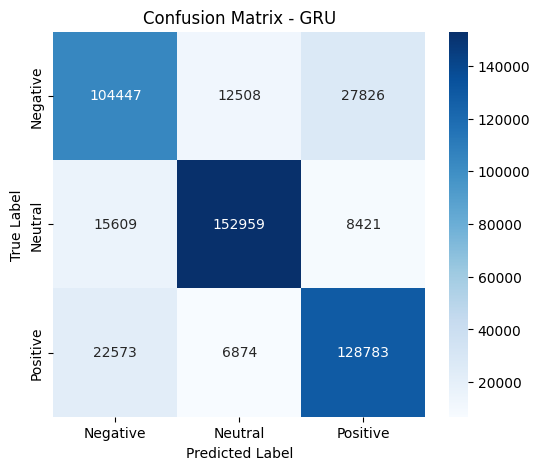

In [54]:
import mlflow
import mlflow.tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set up MLflow
experiment_name = "SentimentAnalysis_Models"
mlflow.set_experiment(experiment_name)
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# # Load GRU Model
# gru_model = tf.keras.models.load_model("saved_models/gru_model.h5")  # Ensure the correct path

# # Load test dataset (Replace with actual test dataset)
# X_test, Y_test = load_test_data()  # Make sure you have this function

with mlflow.start_run(run_name="GRU"):
    print("Logging GRU model...")

    # Log model in MLflow
    mlflow.tensorflow.log_model(gru_model, "GRUThreshold_0.25")

    # Log hyperparameters
    mlflow.log_param("batch_size", 128)
    mlflow.log_param("epochs", 8)
    mlflow.log_param("model_type", "GRU")

    # Evaluate model
    y_pred_probs = gru_model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(Y_test, axis=1)

    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Compute classification report
    report = classification_report(y_true, y_pred, output_dict=True)

    # Log all metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision_negative", report["0"]["precision"])
    mlflow.log_metric("recall_negative", report["0"]["recall"])
    mlflow.log_metric("f1_negative", report["0"]["f1-score"])
    mlflow.log_metric("precision_neutral", report["1"]["precision"])
    mlflow.log_metric("recall_neutral", report["1"]["recall"])
    mlflow.log_metric("f1_neutral", report["1"]["f1-score"])
    mlflow.log_metric("precision_positive", report["2"]["precision"])
    mlflow.log_metric("recall_positive", report["2"]["recall"])
    mlflow.log_metric("f1_positive", report["2"]["f1-score"])

    # Log classification report as JSON
    mlflow.log_dict(report, "classification_report.json")

    # Log Confusion Matrix as Image
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
                xticklabels=["Negative", "Neutral", "Positive"],
                yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - GRU")
    
    # Save and log confusion matrix
    conf_matrix_filename = "GRU_Threshold_0.25_conf_matrix.png"
    plt.savefig(conf_matrix_filename)
    mlflow.log_artifact(conf_matrix_filename)

    print("GRU model and metrics logged successfully!")
    print(f"GRU model logged Accuracy: {accuracy:.4f}")


BERT (Bidirectional Encoder Representations fron Transformers)

In [55]:

import tensorflow as tf


# Clear TensorFlow session
tf.keras.backend.clear_session()

In [56]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.data import AUTOTUNE
from tensorflow.keras import mixed_precision

In [57]:
# Enable mixed precision to reduce memory usage
mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2050, compute capability 8.6


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2050, compute capability 8.6


In [58]:
# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [60]:
#Load Dataset
df=pd.read_csv("D:/Project/Sentiment_Analysis/Dataset/pre_processed/Sentiment140_dataset_with_neutal&cleantext.csv")
df=df.drop(columns=['text'], axis=1)

In [61]:
df.head()

,label,clean_text
0,1.0,awww thats bummer shoulda got david carr third...
1,0.0,upset cant update facebook texting might cry r...
2,0.0,dived many times ball managed save rest go bounds
3,1.0,whole body feels itchy like fire
4,0.0,behaving im mad cant see


In [62]:
df['label'].value_counts()

1.0    589963
2.0    527432
0.0    482605
Name: label, dtype: int64

In [63]:
df.isnull().sum()

label            0
clean_text    7014
dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df.isnull().sum()

label         0
clean_text    0
dtype: int64

In [66]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df["clean_text"], df["label"], test_size=0.3, random_state=1, stratify=df["label"])

In [67]:
print(type(train_texts))
print(train_texts[:5])  # Show first 5 samples


<class 'pandas.core.series.Series'>
691597                                welcome worst day life
130870     glenn hurry come back london want see guys im ...
532118     thanksi know im bit late blocked twitter work ...
828563                                             oh nice x
1441403    pimpin pimpin sleep knocked cousins lap im hit...
Name: clean_text, dtype: object


In [68]:
print(type(train_texts))  # Should be list or Pandas Series
print(type(test_texts))   # Should be list or Pandas Series

# Check first few elements
print(train_texts[:5])
print(test_texts[:5])


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
691597                                welcome worst day life
130870     glenn hurry come back london want see guys im ...
532118     thanksi know im bit late blocked twitter work ...
828563                                             oh nice x
1441403    pimpin pimpin sleep knocked cousins lap im hit...
Name: clean_text, dtype: object
926068     hey boo boo head thankies yes greedy want stic...
488684     cant get hang twitter thing trying looks like ...
869908     arrived netshop minutes ago pacquiao vs hatton...
215107      awhhe man im completely useless rt funny twitter
1471836    yeah actually public schools already started p...
Name: clean_text, dtype: object


In [69]:
print(train_texts.apply(lambda x: type(x)).value_counts())
print(test_texts.apply(lambda x: type(x)).value_counts())


<class 'str'>    1115090
Name: clean_text, dtype: int64
<class 'str'>    477896
Name: clean_text, dtype: int64


In [70]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, test_size=0.2, random_state=1, stratify=train_labels
)

In [71]:
# Function to tokenize and convert to TensorFlow tensors
def encode_texts(texts, labels):
    encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=64)
    input_ids = tf.convert_to_tensor(encodings["input_ids"])
    attention_mask = tf.convert_to_tensor(encodings["attention_mask"])
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)
    return {"input_ids": input_ids, "attention_mask": attention_mask}, labels

In [72]:
# Convert datasets to TensorFlow format
batch_size = 4

train_dataset = tf.data.Dataset.from_tensor_slices(encode_texts(train_texts, train_labels)).batch(batch_size).prefetch(AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices(encode_texts(val_texts, val_labels)).batch(batch_size).prefetch(AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices(encode_texts(test_texts, test_labels)).batch(batch_size).prefetch(AUTOTUNE)

In [73]:
# save the tokenizer for later use
tokenizer.save_pretrained("bert_tokenizer/")


('bert_tokenizer/tokenizer_config.json',
 'bert_tokenizer/special_tokens_map.json',
 'bert_tokenizer/vocab.txt',
 'bert_tokenizer/added_tokens.json')

In [74]:
# Load the pre-trained DistilBERT model for sequence classification

bert_model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)


c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequ

In [75]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy("accuracy")

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [76]:
# Debugging: Check dataset shapes
print(f"Train dataset size: {len(train_texts)}, Validation dataset size: {len(val_texts)}, Test dataset size: {len(test_texts)}")

Train dataset size: 892072, Validation dataset size: 223018, Test dataset size: 477896


In [77]:
# Train Model
from tensorflow.keras.callbacks import ProgbarLogger
epochs = 3
bert_history = bert_model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, steps_per_epoch=5000, validation_steps=2000, verbose=1, callbacks=[ProgbarLogger(count_mode="steps")])  # Force logs in VS Code



Epoch 1/3
5000/5000 [==============================] - 516s 102ms/step - loss: 0.7526 - accuracy: 0.6941 - val_loss: 0.6835 - val_accuracy: 0.7341
Epoch 2/3
5000/5000 [==============================] - 506s 101ms/step - loss: 0.6692 - accuracy: 0.7345 - val_loss: 0.6318 - val_accuracy: 0.7429
Epoch 3/3
5000/5000 [==============================] - 507s 101ms/step - loss: 0.6432 - accuracy: 0.7431 - val_loss: 0.6266 - val_accuracy: 0.7421


In [78]:
bert_model.save("bert_sentiment_model_with_neutral")

INFO:tensorflow:Assets written to: bert_sentiment_model_with_neutral\assets


INFO:tensorflow:Assets written to: bert_sentiment_model_with_neutral\assets


In [79]:
# Evaluate Model
loss, accuracy = bert_model.evaluate(test_dataset, steps=5000)
print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

5000/5000 [==============================] - 113s 22ms/step - loss: 0.6311 - accuracy: 0.7448
Test Loss: 0.6311, Accuracy: 0.7448


In [80]:
bert_model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,779
Trainable params: 66,955,779
Non-trainable params: 0
_________________________________________________________________


In [81]:
y_pred_dict = bert_model.predict(test_dataset)

119474/119474 [==============================] - 2791s 23ms/step


              precision    recall  f1-score   support

    Negative       0.72      0.57      0.63    144743
     Neutral       0.83      0.82      0.82    174935
    Positive       0.69      0.83      0.76    158218

    accuracy                           0.75    477896
   macro avg       0.75      0.74      0.74    477896
weighted avg       0.75      0.75      0.74    477896

Confusion Matrix:
 [[ 82319  20396  42028]
 [ 15556 143193  16186]
 [ 16821   9570 131827]]


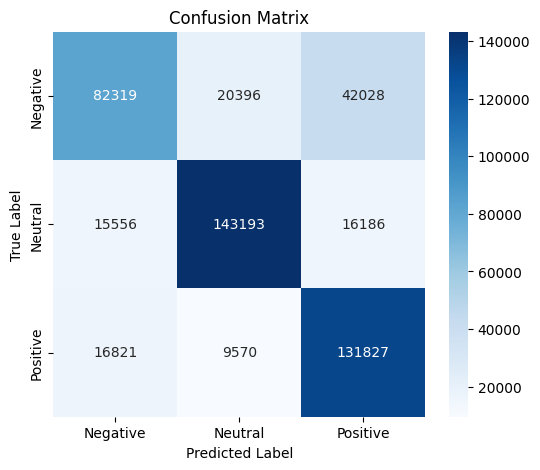

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
#  Get Model Predictions

# Get model predictions
#y_pred_dict = bert_model.predict(test_dataset)
y_pred_probs = y_pred_dict["logits"]  # Extract logits
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Convert TensorFlow dataset labels to numpy
y_true = np.concatenate([y for _, y in test_dataset], axis=0)

# Classification Report
target_names = ["Negative", "Neutral", "Positive"]
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

#  Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


MLFLOW LOG

2025/03/23 17:05:23 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Logging BERT model...


INFO:tensorflow:Assets written to: C:\Users\loges\AppData\Local\Temp\tmp2amur3ms\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\loges\AppData\Local\Temp\tmp2amur3ms\model\data\model\assets
2025/03/23 17:05:54 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\loges\AppData\Local\Temp\tmp2amur3ms\model, flavor: tensorflow), fall back to return ['tensorflow==2.10.1']. Set logging level to DEBUG to see the full traceback.


119474/119474 [==============================] - 2452s 21ms/step
BERT model and metrics logged successfully!
BERT model logged Accuracy: 0.7477


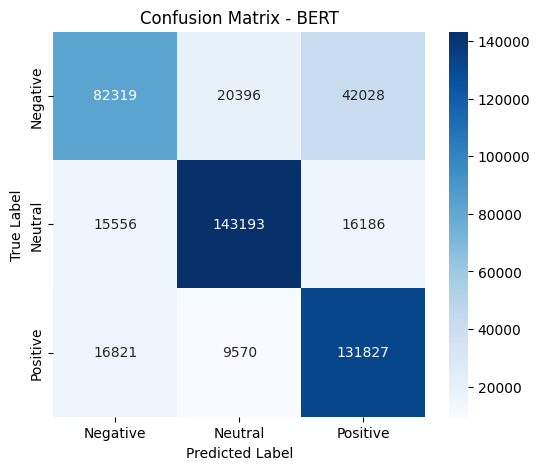

In [84]:
import mlflow
import mlflow.tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set up MLflow
experiment_name = "SentimentAnalysis_Models"
mlflow.set_experiment(experiment_name)
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Load GRU Model
#bert_model = tf.keras.models.load_model("bert_sentiment_model_netural_option")

# # Load test dataset (Replace with actual test dataset)
# X_test, Y_test = load_test_data()  # Make sure you have this function

with mlflow.start_run(run_name="BERT"):
    print("Logging BERT model...")

    # Log model in MLflow
    mlflow.tensorflow.log_model(bert_model, "BERT_thershold")

    # Log hyperparameters
    mlflow.log_param("batch_size", 128)#
    mlflow.log_param("epochs", 8)
    mlflow.log_param("model_type", "BERT")

    # Evaluate model
    y_pred_dict = bert_model.predict(test_dataset)
    y_pred_probs = y_pred_dict["logits"]  # Extract logits
    y_pred = np.argmax(y_pred_probs, axis=1)
    # Convert TensorFlow dataset labels to numpy
    y_true = np.concatenate([y for _, y in test_dataset], axis=0)
    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Compute classification report
    report = classification_report(y_true, y_pred, output_dict=True)

    # Log all metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision_negative", report["0"]["precision"])
    mlflow.log_metric("recall_negative", report["0"]["recall"])
    mlflow.log_metric("f1_negative", report["0"]["f1-score"])
    mlflow.log_metric("precision_neutral", report["1"]["precision"])
    mlflow.log_metric("recall_neutral", report["1"]["recall"])
    mlflow.log_metric("f1_neutral", report["1"]["f1-score"])
    mlflow.log_metric("precision_positive", report["2"]["precision"])
    mlflow.log_metric("recall_positive", report["2"]["recall"])
    mlflow.log_metric("f1_positive", report["2"]["f1-score"])

    # Log classification report as JSON
    mlflow.log_dict(report, "classification_report.json")

    # Log Confusion Matrix as Image
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
                xticklabels=["Negative", "Neutral", "Positive"],
                yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - BERT")
    
    # Save and log confusion matrix
    conf_matrix_filename = "BERT_conf_matrix.png"
    plt.savefig(conf_matrix_filename)
    mlflow.log_artifact(conf_matrix_filename)

    print("BERT model and metrics logged successfully!")
    print(f"BERT model logged Accuracy: {accuracy:.4f}")
